## Question 1:

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm
import math

In [55]:
data_x = []
data_y = []
data_z = []

N = 10000
prior = [0.15, 0.35, 0.5]
l_1 = 0
l_2 = 0
l_3 = 0

mu_x = [-1, 0]
variance_x = [[1, -0.4], [-0.4, 0.5]]

mu_y = [1, 0]
variance_y = [[0.5, 0], [0, 0.2]]

mu_z = [0, 1]
variance_z = [[0.1, 0], [0, 0.1]]

In [56]:
#generating sample and checking for prior values
for i in range(N):
    r = np.random.uniform(0, 1, 1)
    if r <= prior[0]:
        l_1 = l_1 + 1
    elif r <= prior[1] + prior[0]:
        l_2 = l_2 + 1
    else: 
        l_3 = l_3 + 1
        
l_1, l_2, l_3

(1448, 3517, 5035)

In [57]:
#generating data according to label
data_x = np.random.multivariate_normal(mu_x, variance_x, l_1)

data_y = np.random.multivariate_normal(mu_y, variance_y, l_2)  
    
data_z = np.random.multivariate_normal(mu_z, variance_z, l_3)   

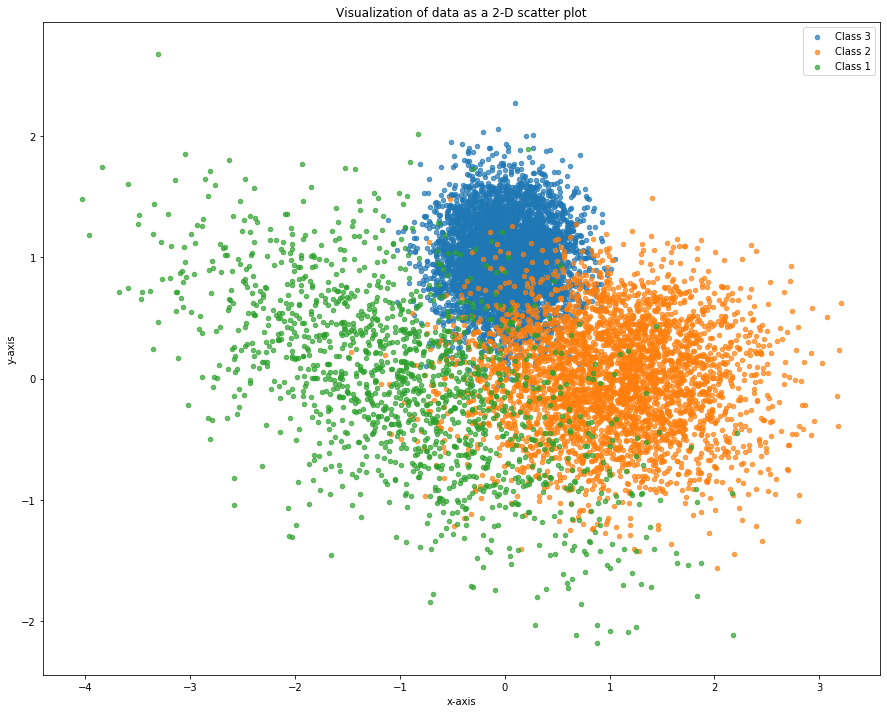

In [58]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(data_z)[:, 0], np.array(data_z)[:, 1], s = 20, alpha=0.7, label='Class 3')
ax.scatter(np.array(data_y)[:, 0], np.array(data_y)[:, 1], s = 20, alpha=0.7, label='Class 2')
ax.scatter(np.array(data_x)[:, 0], np.array(data_x)[:, 1], s = 20, alpha=0.7, label='Class 1')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Visualization of data as a 2-D scatter plot')
ax.legend()
plt.show()

In [59]:
def normal_prob(x, m, v):
    x_t = x
    m_t = m
    np.reshape(x, (2,1))
    np.reshape(m, (2,1))
    p = math.exp(-0.5*np.matmul(np.matmul((x_t-m_t), np.linalg.inv(v)), (x-m)))/(2*math.pi*np.linalg.det(v))
    return p

In [60]:
x_right = []
x_error_y = []
x_error_z = []

y_right = []
y_error_x = []
y_error_z = []

z_right = []
z_error_x = []
z_error_y = []

for i in range(l_1):
    p_1 = normal_prob(np.array(data_x)[i, :], mu_x, variance_x)
    p_2 = normal_prob(np.array(data_x)[i, :], mu_y, variance_y)
    p_3 = normal_prob(np.array(data_x)[i, :], mu_z, variance_z)
    if (p_1*prior[0] >= p_2*prior[1]) and (p_1*prior[0] >= p_3*prior[2]):
        x_right.append(np.array(data_x)[i, :])
    elif p_2*prior[1] >= p_3*prior[2]:
        x_error_y.append(np.array(data_x)[i, :])
    else:
        x_error_z.append(np.array(data_x)[i, :])
        
for i in range(l_2):
    p_1 = normal_prob(np.array(data_y)[i, :], mu_x, variance_x)
    p_2 = normal_prob(np.array(data_y)[i, :], mu_y, variance_y)
    p_3 = normal_prob(np.array(data_y)[i, :], mu_z, variance_z)
    if (p_2*prior[1] >= p_1*prior[0]) and (p_2*prior[1] >= p_3*prior[2]):
        y_right.append(np.array(data_y)[i, :])
    elif p_1*prior[0] >= p_3*prior[2]:
        y_error_x.append(np.array(data_y)[i, :])
    else:
        y_error_z.append(np.array(data_y)[i, :])
        
for i in range(l_3):
    p_1 = normal_prob(np.array(data_z)[i, :], mu_x, variance_x)
    p_2 = normal_prob(np.array(data_z)[i, :], mu_y, variance_y)
    p_3 = normal_prob(np.array(data_z)[i, :], mu_z, variance_z)
    if (p_3*prior[2] >= p_1*prior[0]) and (p_3*prior[2] >= p_2*prior[1]):
        z_right.append(np.array(data_z)[i, :])
    elif p_1*prior[0] >= p_2*prior[1]:
        z_error_x.append(np.array(data_z)[i, :])
    else:
        z_error_y.append(np.array(data_z)[i, :])

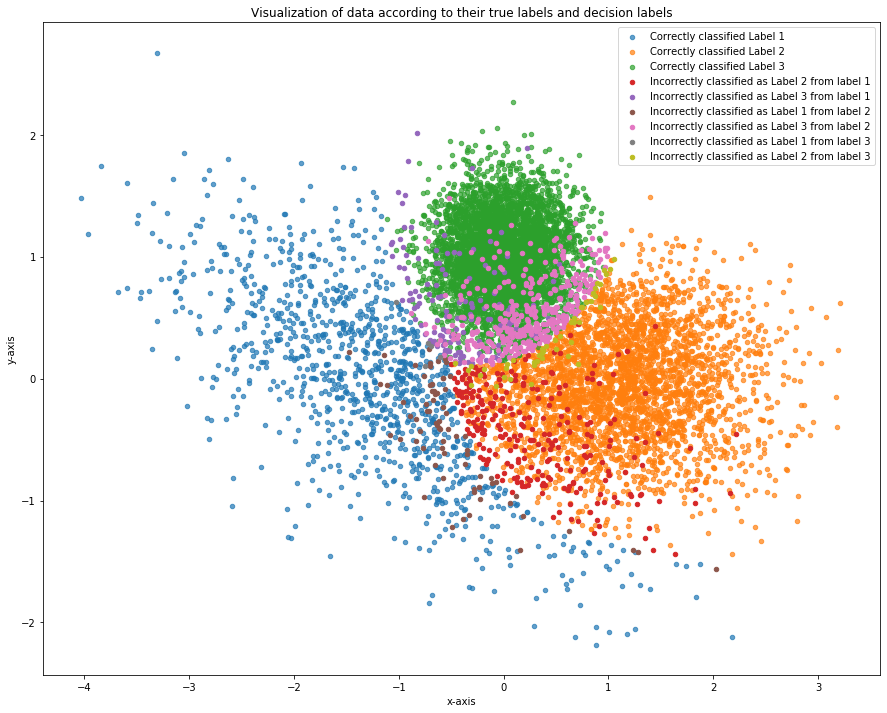

In [61]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(x_right)[:, 0], np.array(x_right)[:, 1], s = 20, alpha=0.7, label='Correctly classified Label 1')
ax.scatter(np.array(y_right)[:, 0], np.array(y_right)[:, 1], s = 20, alpha=0.7, label='Correctly classified Label 2')
ax.scatter(np.array(z_right)[:, 0], np.array(z_right)[:, 1], s = 20, alpha=0.7, label='Correctly classified Label 3')
ax.scatter(np.array(x_error_y)[:, 0], np.array(x_error_y)[:, 1], s = 20, alpha=1, label='Incorrectly classified as Label 2 from label 1')
ax.scatter(np.array(x_error_z)[:, 0], np.array(x_error_z)[:, 1], s = 20, alpha=1, label='Incorrectly classified as Label 3 from label 1')
ax.scatter(np.array(y_error_x)[:, 0], np.array(y_error_x)[:, 1], s = 20, alpha=1, label='Incorrectly classified as Label 1 from label 2')
ax.scatter(np.array(y_error_z)[:, 0], np.array(y_error_z)[:, 1], s = 20, alpha=1, label='Incorrectly classified as Label 3 from label 2')
ax.scatter(np.array(z_error_x)[:, 0], np.array(z_error_x)[:, 1], s = 20, alpha=1, label='Incorrectly classified as Label 1 from label 3')
ax.scatter(np.array(z_error_y)[:, 0], np.array(z_error_y)[:, 1], s = 20, alpha=1, label='Incorrectly classified as Label 2 from label 3')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Visualization of data according to their true labels and decision labels')
ax.legend()
plt.show()

In [62]:
c_mat = [[len(x_right), len(y_error_x), len(z_error_x)], [len(x_error_y), len(y_right), len(z_error_y)], [len(x_error_z), len(y_error_z), len(z_right)]]

print("The actual number of samples that were generated from class 1 = {}, class 2 = {}, and class 3 = {}".format(l_1, l_2, l_3))

print("\nThe confusion matrix is:\n {}".format(np.array(c_mat)))

print("\nThe total number of samples misclassified by the classifier are {}".format(len(x_error_y) + len(x_error_z) + len(y_error_x) + len(y_error_z) + len(z_error_x) + len(z_error_y)))

print("\nThe error probability is {}.".format((len(x_error_y) + len(x_error_z) + len(y_error_x) + len(y_error_z) + len(z_error_x) + len(z_error_y))/N))

The actual number of samples that were generated from class 1 = 1448, class 2 = 3517, and class 3 = 5035

The confusion matrix is:
 [[1051   72    5]
 [ 264 3077   46]
 [ 133  368 4984]]

The total number of samples misclassified by the classifier are 888

The error probability is 0.0888.


#### Description of Results:
1) The number of samples for each class have been distributed randomly by a uniform distribution with parameters (0,1). The samples themselves have been distributed randomly in a Gaussian distribution of the respectives parameters given in the question.

2) The confusion matrix shows all the classifications done by the classifier, which includes all the correct classifications as well as the mis-classifications. The confusion matrix is sufficient for us to derive most of the basic inferences about the samples and the classifier. Here, we can see that a majority of the samples are covered in the diagonal elements which shows that a major portion of the data has been classified correctly.

3) The total number of samples misclassified by the classifier are 873. 

4) The probability of error is given by:
       Probability of error = Total number of misclassified sample / Total number of samples
                            = 873/10000
                            = 0.0873
                            
5) The scatter plot helps us infer numerous properties regarding the classifications of various samples by the classifier. There are total of 3 classes and hence 6 misclassifications possible. All the 9 (3+6) cases of markings have been covered in the above graph.